In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..\..\..\..').resolve())
sys.path.append(parent_path)

In [3]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.constants.events import select_sc19
from triple_agent.reports.specific.character_selection import (spy_selection,
                                                      st_selection,
                                                      amba_selection,
                                                      double_agent_selection,
                                                      determine_character_in_role)
from triple_agent.reports.specific.game_outcomes import game_outcomes
from triple_agent.classes.roles import Roles
from triple_agent.classes.outcomes import WinType
from triple_agent.classes.missions import Missions, MissionStatus
from triple_agent.classes.venues import Venue
from triple_agent.reports.generation.common_sort_functions import sort_by_spy_wins, sort_by_sniper_wins
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties, PlotLabelStyle
from triple_agent.reports.specific.action_tests import action_test_percentages, diff_action_test_percentages
from triple_agent.reports.specific.mission_choices import mission_choices
from triple_agent.reports.specific.mission_completes import (mission_completion_query,
    mission_completion,
    _mission_completes_details)
from triple_agent.classes.action_tests import ActionTest
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from itertools import zip_longest

In [4]:
event = 'SCL6'

In [5]:
replays = get_parsed_replays(lambda g: g.event == event)

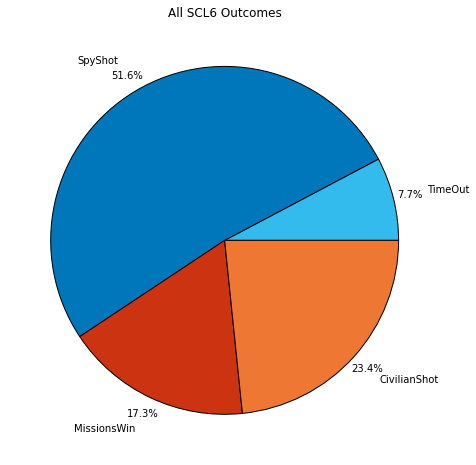

,WinType.TimeOut,WinType.SpyShot,WinType.MissionsWin,WinType.CivilianShot
NaN,51,340,114,154


In [6]:
game_outcomes(
    replays,
    axis_properties=AxisProperties(title=f"All {event} Outcomes")
).frame

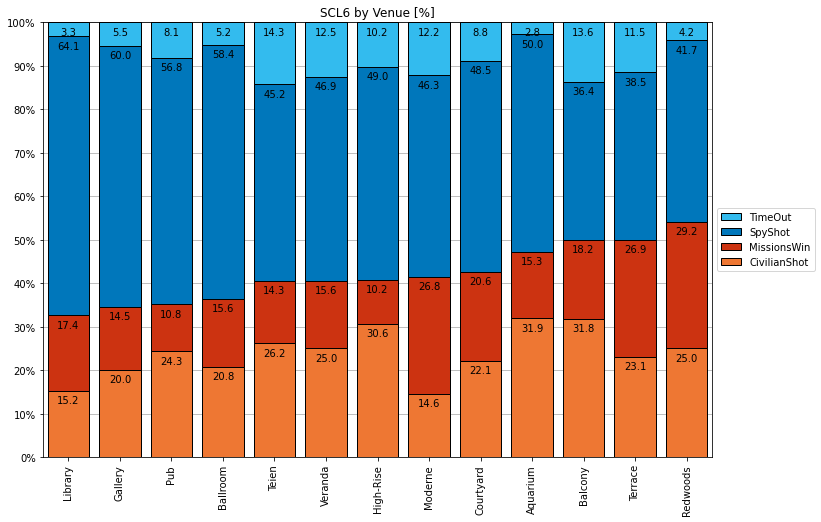

,Venue.Library,Venue.Gallery,Venue.Pub,Venue.Ballroom,Venue.Teien,Venue.Veranda,Venue.HighRise,Venue.Moderne,Venue.Courtyard,Venue.Aquarium,Venue.Balcony,Venue.Terrace,Venue.Redwoods
WinType.TimeOut,0.032609,0.054545,0.081081,0.051948,0.142857,0.12500,0.102041,0.121951,0.088235,0.027778,0.136364,0.115385,0.041667
WinType.SpyShot,0.641304,0.600000,0.567568,0.584416,0.452381,0.46875,0.489796,0.463415,0.485294,0.500000,0.363636,0.384615,0.416667
WinType.MissionsWin,0.173913,0.145455,0.108108,0.155844,0.142857,0.15625,0.102041,0.268293,0.205882,0.152778,0.181818,0.269231,0.291667
WinType.CivilianShot,0.152174,0.200000,0.243243,0.207792,0.261905,0.25000,0.306122,0.146341,0.220588,0.319444,0.318182,0.230769,0.250000


In [7]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True,
    ),
    axis_properties=AxisProperties(
        title=f"{event} by Venue [%]",
        data_label_style=PlotLabelStyle.Plain,
    )
).frame

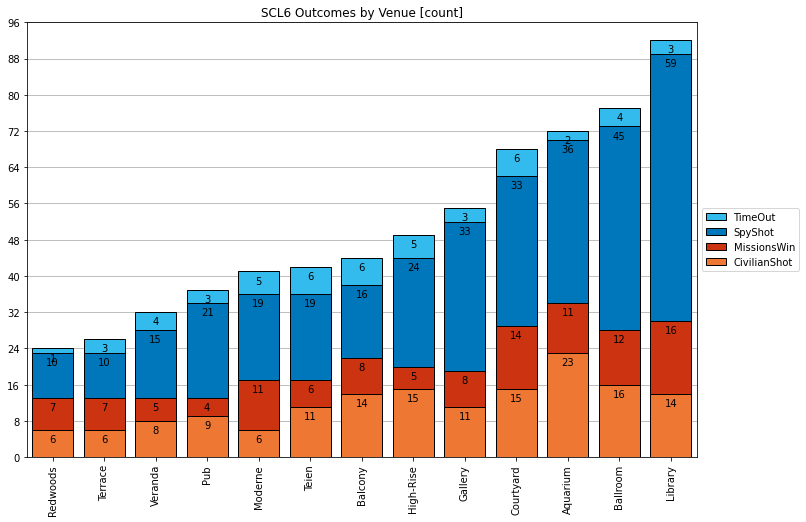

,Venue.Redwoods,Venue.Terrace,Venue.Veranda,Venue.Pub,Venue.Moderne,Venue.Teien,Venue.Balcony,Venue.HighRise,Venue.Gallery,Venue.Courtyard,Venue.Aquarium,Venue.Ballroom,Venue.Library
WinType.TimeOut,1,3,4,3,5,6,6,5,3,6,2,4,3
WinType.SpyShot,10,10,15,21,19,19,16,24,33,33,36,45,59
WinType.MissionsWin,7,7,5,4,11,6,8,5,8,14,11,12,16
WinType.CivilianShot,6,6,8,9,6,11,14,15,11,15,23,16,14


In [8]:
game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.venue,
        secondary_order=sum,
    ),
    axis_properties=AxisProperties(
        title=f"{event} Outcomes by Venue [count]",
        data_label_style=PlotLabelStyle.Plain,
    )
).frame

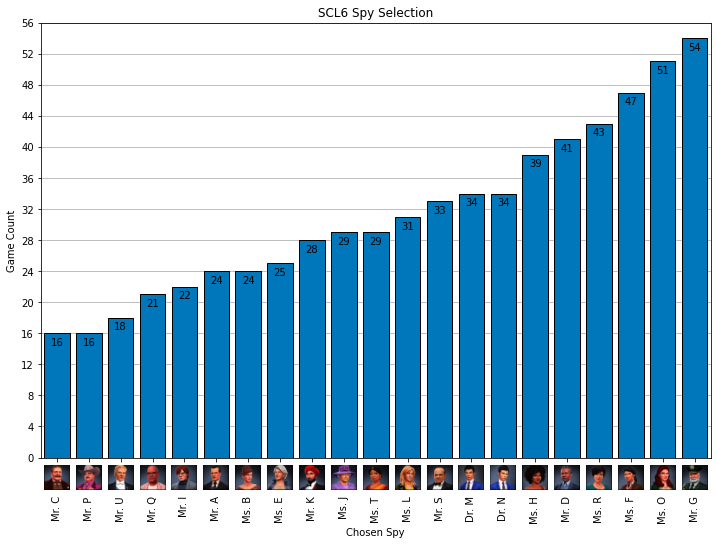

In [9]:
_ = spy_selection(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Spy Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Spy",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

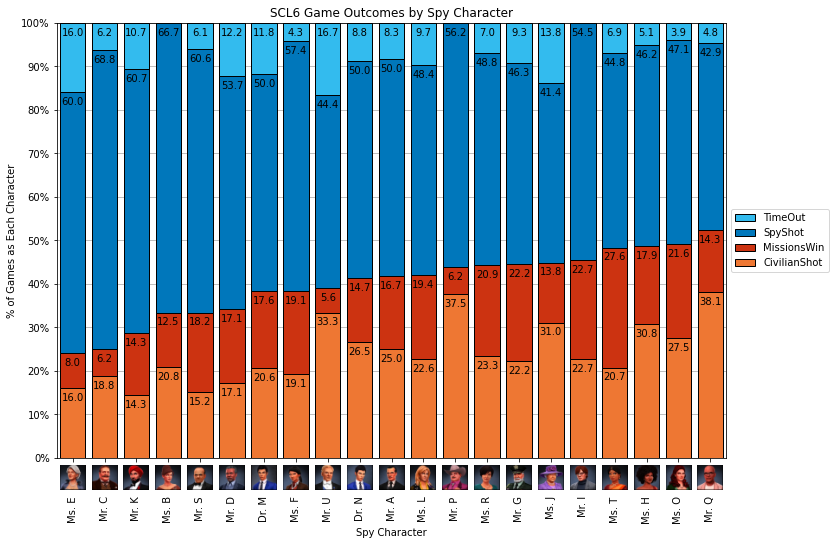

In [10]:
_ = game_outcomes(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Game Outcomes by Spy Character",
        x_axis_portrait=True,
        y_axis_label="% of Games as Each Character",
        x_axis_label="Spy Character",
        data_label_style=PlotLabelStyle.Plain,
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: determine_character_in_role(g, Roles.Spy),
        secondary_order=sort_by_spy_wins,
        percent_normalized_data=True
    )
)

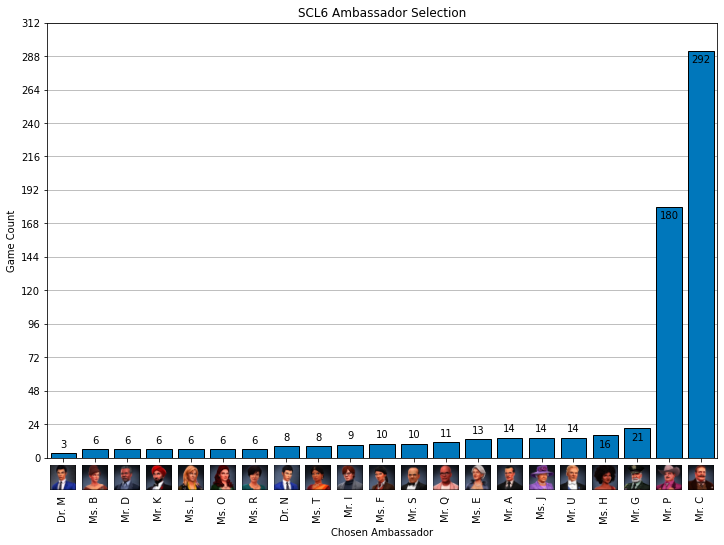

In [11]:
_ = amba_selection(
    replays,
    axis_properties = AxisProperties(
        title=f"{event} Ambassador Selection",
        x_axis_portrait=True,
        y_axis_label="Game Count",
        x_axis_label="Chosen Ambassador",
    ),
    data_query = DataQueryProperties(
        primary_order=sum,
    )
)

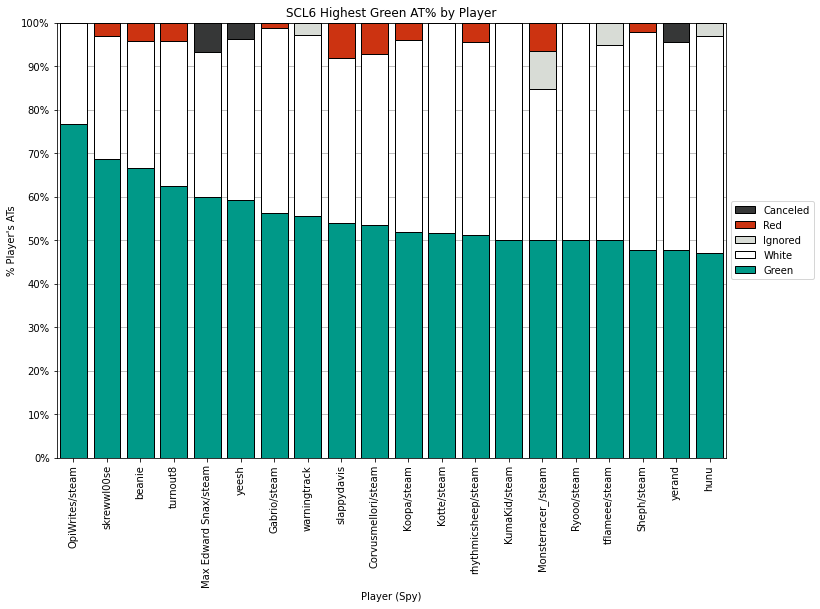

In [12]:
_ = action_test_percentages(
    replays,
    axis_properties = AxisProperties(
        title=f'{event} Highest Green AT% by Player',
        x_axis_label='Player (Spy)',
        y_axis_label='% Player\'s ATs',
    ),
    data_query = DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=lambda name_series: -name_series[1][ActionTest.Green],
        reverse_primary_order=True,
        percent_normalized_data=True,
        limit=20
    )    
)

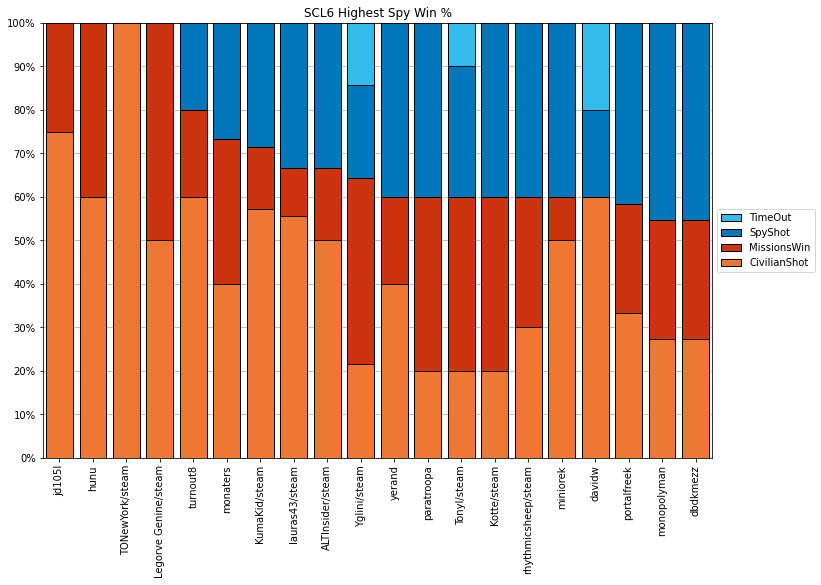

In [13]:
spy_winr = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.spy,
        secondary_order=sort_by_spy_wins,
        reverse_secondary_order=True,
        percent_normalized_data=True,
        limit=20
    ),
    axis_properties=AxisProperties(title=f"{event} Highest Spy Win %")
)

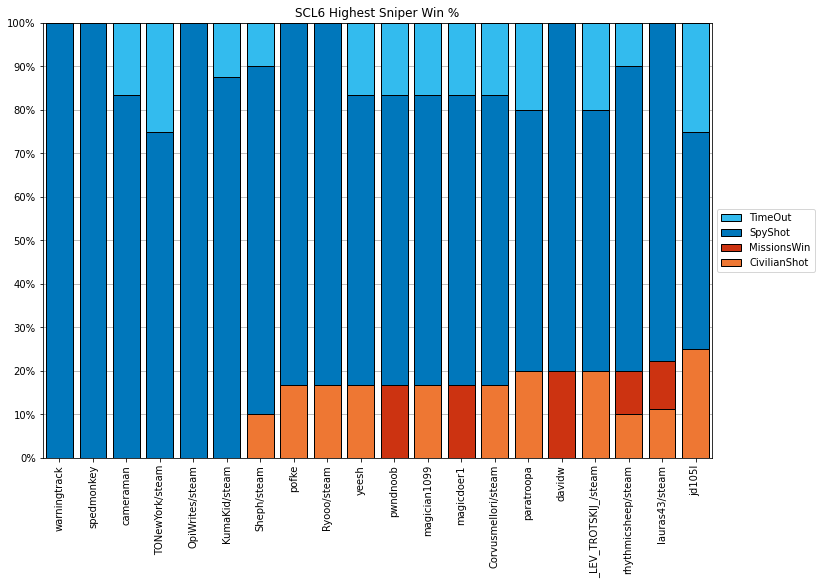

In [14]:
_ = game_outcomes(
    replays,
    DataQueryProperties(
        groupby=lambda g: g.sniper,
        secondary_order=sort_by_sniper_wins,
        reverse_secondary_order=True,
        percent_normalized_data=True,
        limit=20
    ),
    axis_properties=AxisProperties(title=f"{event} Highest Sniper Win %")
)

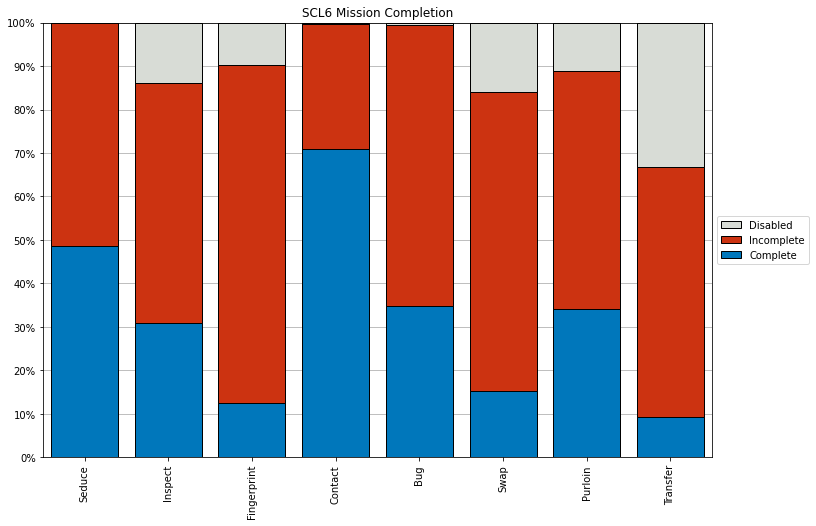

In [15]:
mission_completion(replays, f"{event} Mission Completion")

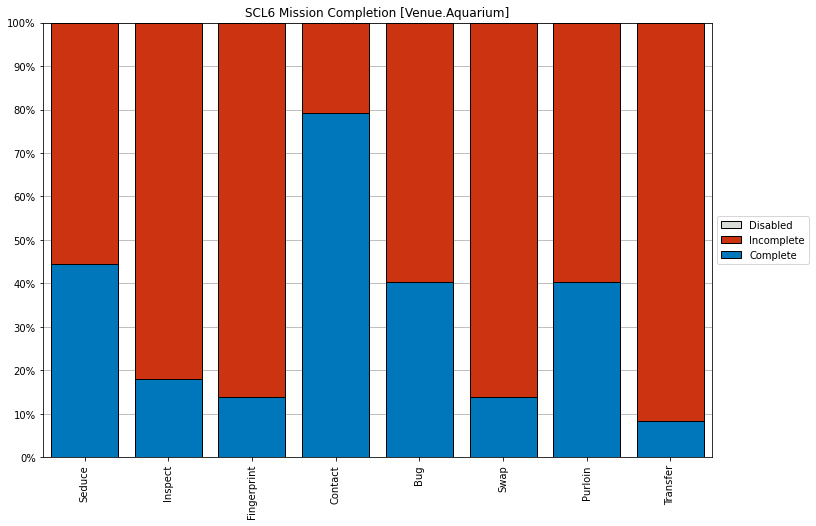

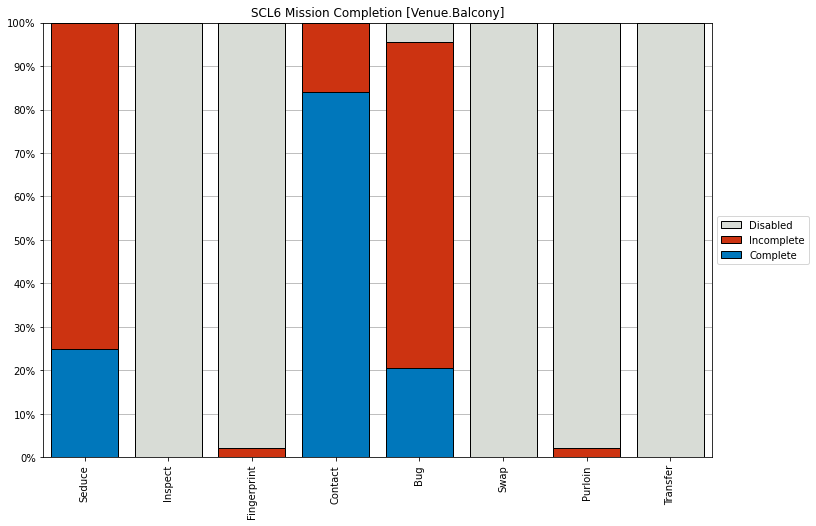

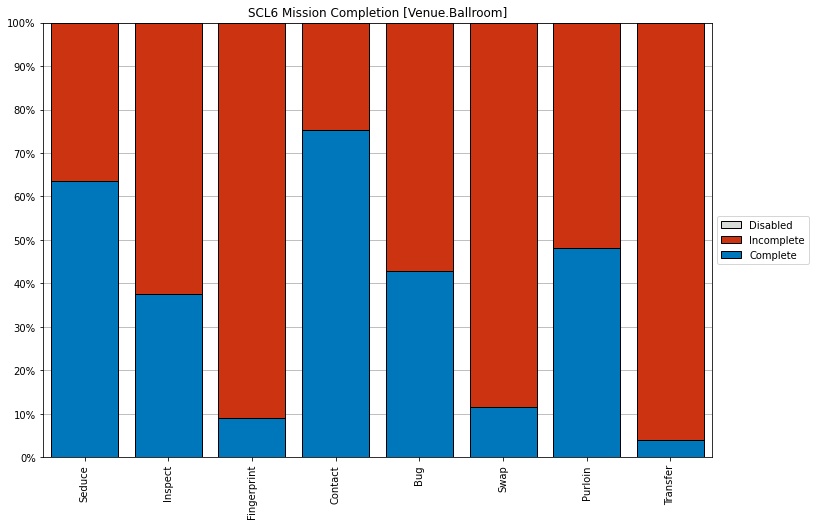

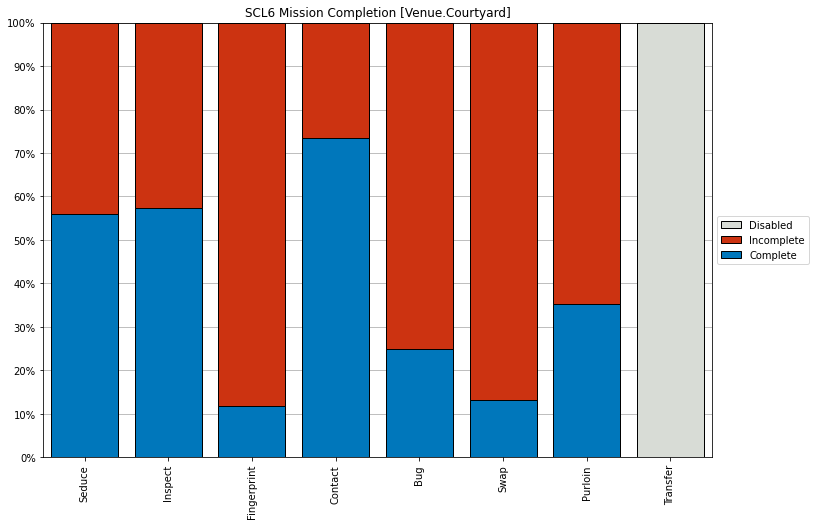

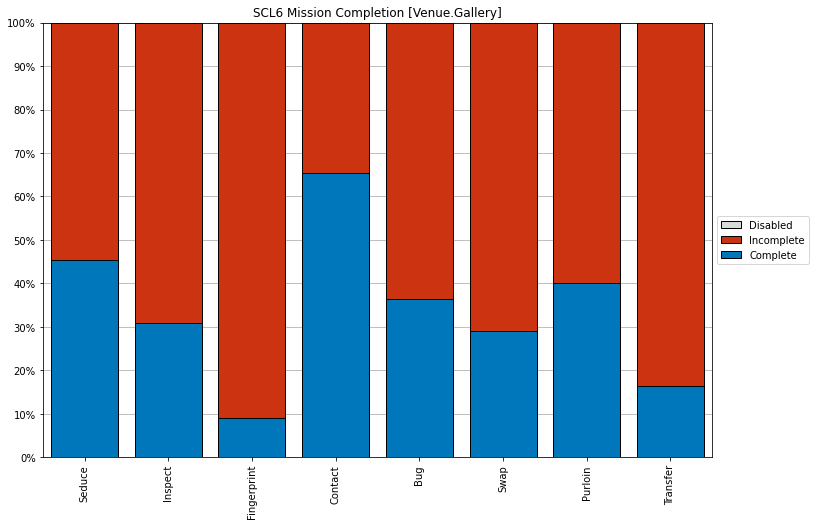

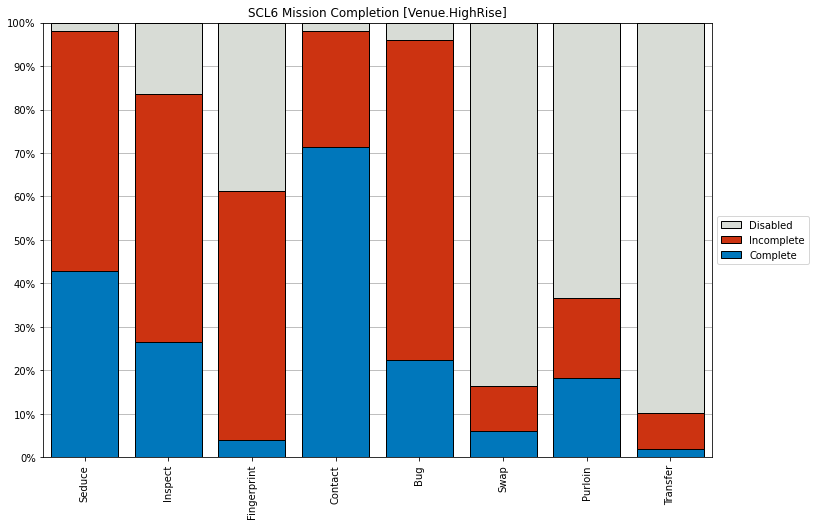

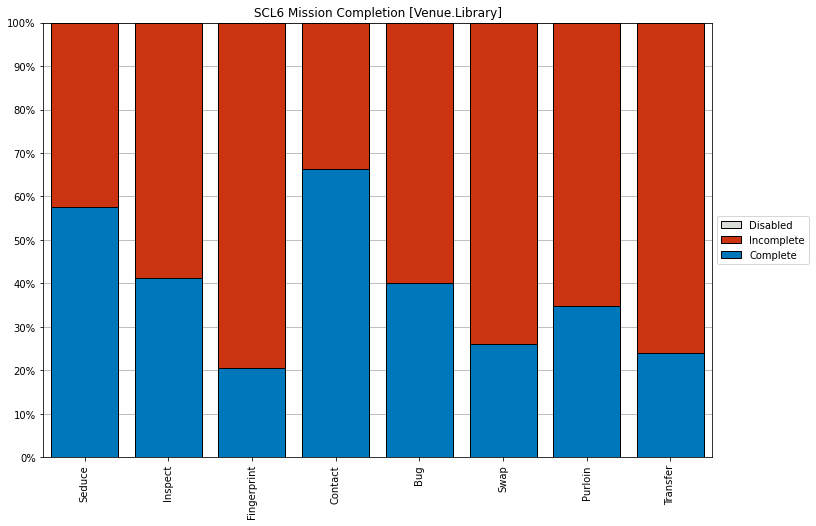

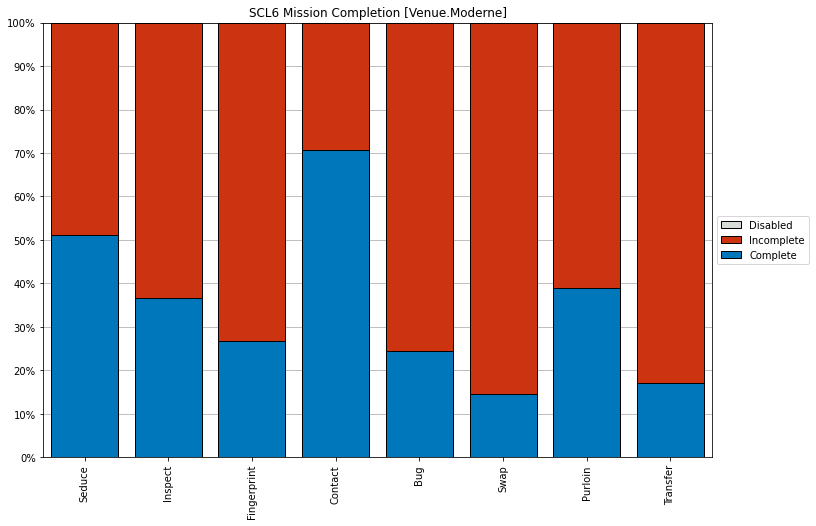

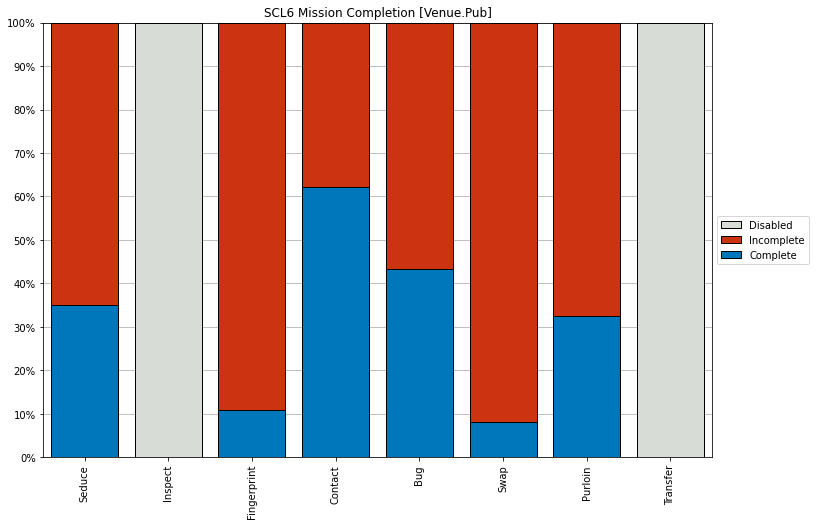

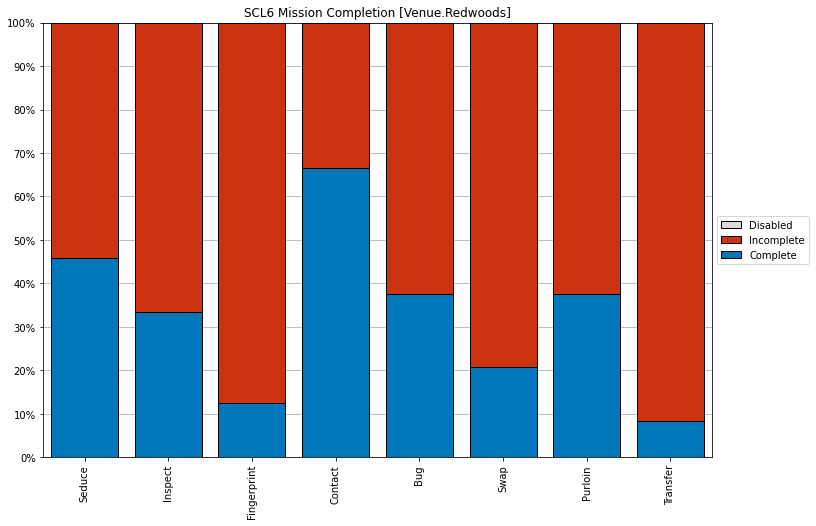

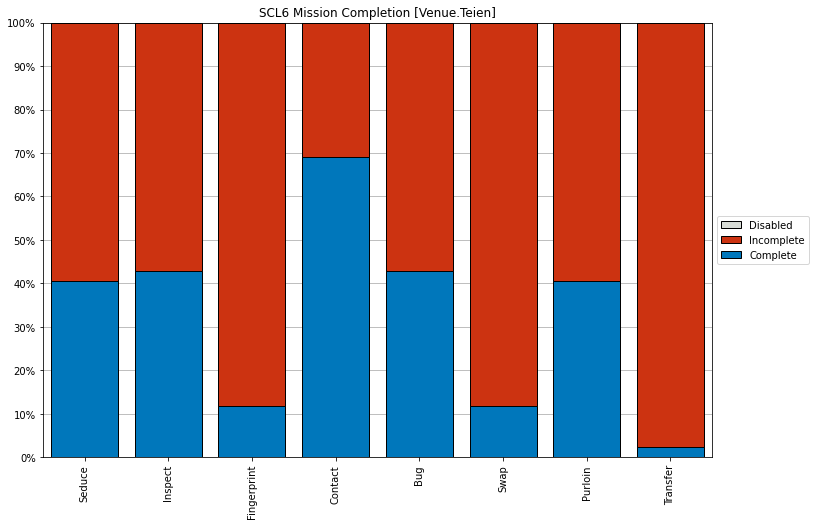

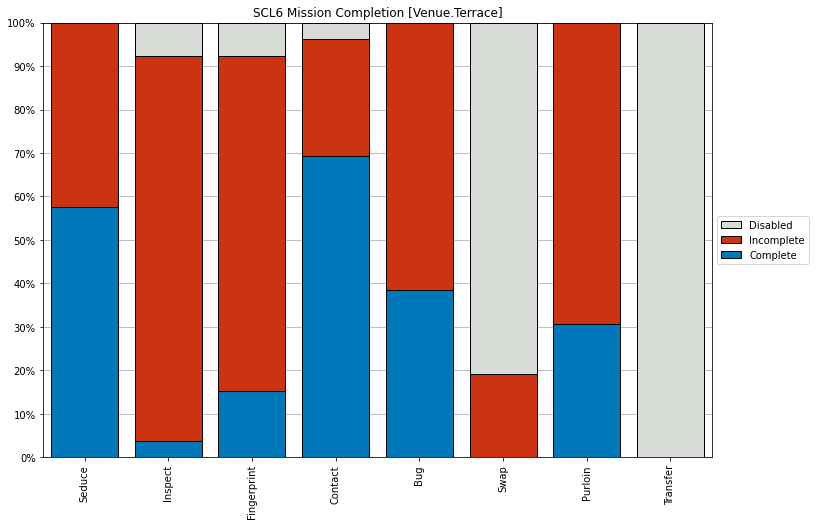

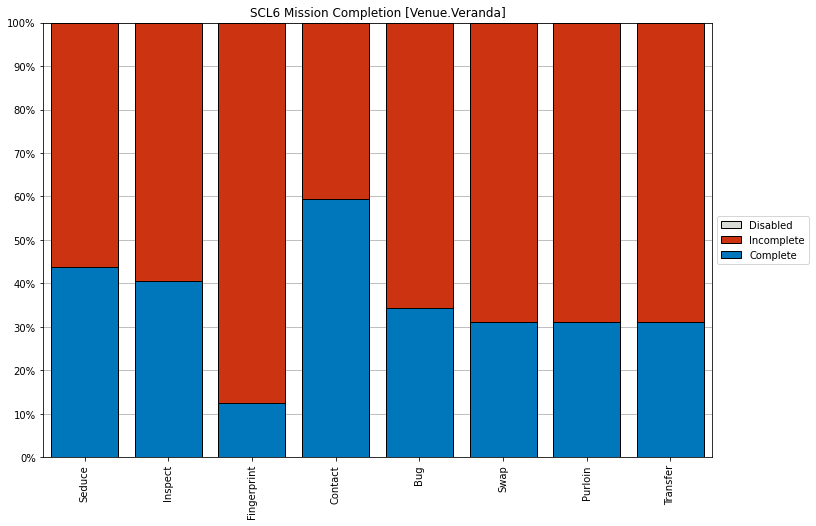

In [16]:
for venue in sorted(set([g.venue for g in replays])):
    mission_completion(list(filter(lambda g: g.venue == venue, replays)), f"{event} Mission Completion [{venue}]")